In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [120]:
# Original data for reference
car_data = np.array([
    15.16, 14.50, 14.59, 12.80, 12.15, 11.47, 12.16, 12.06, 12.25, 12.04,
    12.18, 12.62, 16.11, 15.53, 16.48, 15.86, 18.55, 17.55, 17.91, 17.43,
    18.95, 18.27, 18.14, 16.85, 16.35, 16.75, 17.03, 18.77, 18.81, 18.28,
    17.70, 17.85, 16.92, 16.88, 16.78, 16.83, 16.90, 16.87, 16.71, 16.54,
    16.53, 15.79, 15.93, 15.96, 16.89, 17.22, 17.11, 17.46, 17.09, 17.18,
    17.51, 17.71, 18.04, 18.82, 19.34, 18.46, 19.47, 19.03, 19.23, 19.17,
    18.91, 17.65, 16.98, 18.14, 17.92, 17.80, 17.88, 17.75
])

In [121]:
dates = pd.date_range(start="2008-03-01", periods=len(car_data), freq="Q")
series = pd.Series(car_data, index=dates)
df = series.to_frame(name='car')

C:\Users\AgapitoXD\AppData\Local\Temp\ipykernel_4060\1065581922.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(start="2008-03-01", periods=len(car_data), freq="Q")


In [122]:
roa_data = [
    -0.03, -0.14, 0.04, 0.19, 0.09, 0.25, 0.37, 0.48, 0.63, 0.60,
    0.85, 0.79, 1.00, 1.28, 1.32, 1.53, 1.63, 1.60, 1.50, 1.31,
    1.76, 1.71, 1.68, 1.36, 0.85, 0.86, 0.97, 1.25, 1.42, 1.35,
    1.29, 1.26, 1.28, 1.30, 1.39, 1.34, 1.39, 1.42, 1.45, 1.60,
    1.60, 1.53, 1.55, 1.31, 1.27, 1.28, 1.24, 1.21, 1.26, 1.07,
    1.05, 0.86, 0.79, 0.93, 0.98, 1.07, 1.33, 1.31, 1.46, 1.46,
    1.88, 1.96, 1.91, 1.84, 1.84, 1.84, 1.89, 1.90
]

In [123]:
df['roa'] = roa_data

In [124]:
df['roe'] = [
    -0.28, -1.16, 0.34, 1.66, 0.78, 2.14, 3.05, 4.24, 5.49, 5.17,
    7.22, 7.02, 8.50, 10.90, 11.00, 13.12, 13.57, 13.43, 11.99, 10.70,
    13.38, 14.05, 13.66, 11.76, 6.85, 7.30, 8.25, 10.59, 11.62, 11.01,
    10.58, 9.95, 9.83, 10.14, 10.86, 10.52, 10.89, 11.36, 11.28, 12.70,
    12.53, 12.06, 11.88, 10.27, 9.48, 9.38, 8.99, 8.77, 8.96, 7.49,
    7.30, 5.97, 5.47, 6.62, 6.89, 7.85, 9.13, 9.25, 10.05, 10.59,
    12.53, 12.79, 12.50, 12.33, 11.97, 11.69, 12.11, 12.27
]

In [125]:
df['eay'] = [ 9.57, 9.68, 9.44, 9.20, 8.91, 8.71, 8.82, 8.89, 8.81, 8.47,
    8.58, 8.42, 8.79, 8.86, 8.40, 8.02, 8.11, 8.23, 8.45, 7.87,
    8.00, 7.49, 7.55, 7.11, 7.24, 7.01, 7.02, 6.97, 7.18, 7.24,
    7.20, 7.35, 7.65, 7.35, 7.47, 7.21, 7.16, 7.13, 7.25, 7.22,
    7.35, 7.40, 7.61, 7.58, 7.90, 8.16, 8.20, 8.04, 8.07, 7.69,
    8.20, 7.88, 7.92, 7.55, 7.46, 7.22, 8.12, 7.36, 7.18, 6.81,
    8.74, 9.36, 9.69, 9.72, 10.03, 10.44, 10.41, 10.41
]

In [126]:
df

,car,roa,roe,eay
2008-03-31,15.16,-0.03,-0.28,9.57
2008-06-30,14.50,-0.14,-1.16,9.68
2008-09-30,14.59,0.04,0.34,9.44
2008-12-31,12.80,0.19,1.66,9.20
2009-03-31,12.15,0.09,0.78,8.91
...,...,...,...,...
2023-12-31,18.14,1.84,12.33,9.72
2024-03-31,17.92,1.84,11.97,10.03
2024-06-30,17.80,1.84,11.69,10.44
2024-09-30,17.88,1.89,12.11,10.41


In [127]:
df['fc'] = [
    4.48, 4.57, 4.51, 4.33, 4.27, 4.08, 3.97, 3.80, 3.67, 3.46,
    3.50, 3.38, 3.50, 3.45, 3.18, 2.92, 3.06, 3.09, 3.20, 2.95,
    2.99, 2.69, 2.55, 2.21, 2.17, 2.01, 1.95, 1.91, 1.98, 2.00,
    1.98, 2.01, 2.12, 2.02, 2.05, 1.95, 1.92, 1.91, 1.94, 1.92,
    1.99, 2.04, 2.21, 2.40, 2.78, 3.12, 3.11, 2.91, 2.68, 2.29,
    2.35, 2.03, 1.86, 1.56, 1.46, 1.38, 1.46, 1.29, 1.25, 1.34,
    2.13, 2.69, 3.17, 3.37, 3.63, 3.85, 3.86, 3.81
]

In [128]:
df

,car,roa,roe,eay,fc
2008-03-31,15.16,-0.03,-0.28,9.57,4.48
2008-06-30,14.50,-0.14,-1.16,9.68,4.57
2008-09-30,14.59,0.04,0.34,9.44,4.51
2008-12-31,12.80,0.19,1.66,9.20,4.33
2009-03-31,12.15,0.09,0.78,8.91,4.27
...,...,...,...,...,...
2023-12-31,18.14,1.84,12.33,9.72,3.37
2024-03-31,17.92,1.84,11.97,10.03,3.63
2024-06-30,17.80,1.84,11.69,10.44,3.85
2024-09-30,17.88,1.89,12.11,10.41,3.86


In [129]:
df['is'] = [
    5.09, 5.11, 4.93, 4.87, 4.64, 4.63, 4.85, 5.09, 5.14, 5.02,
    5.09, 5.04, 5.29, 5.42, 5.22, 5.10, 5.05, 5.14, 5.25, 4.92,
    5.01, 4.81, 5.00, 4.90, 5.07, 5.00, 5.07, 5.06, 5.20, 5.24,
    5.22, 5.35, 5.53, 5.33, 5.43, 5.26, 5.24, 5.22, 5.31, 5.30,
    5.35, 5.36, 5.40, 5.18, 5.12, 5.04, 5.08, 5.13, 5.39, 5.39,
    5.86, 5.85, 6.06, 5.99, 6.01, 5.84, 6.66, 6.08, 5.93, 5.48,
    6.61, 6.68, 6.52, 6.35, 6.40, 6.59, 6.55, 6.60
]

In [130]:
df

,car,roa,roe,eay,fc,is
2008-03-31,15.16,-0.03,-0.28,9.57,4.48,5.09
2008-06-30,14.50,-0.14,-1.16,9.68,4.57,5.11
2008-09-30,14.59,0.04,0.34,9.44,4.51,4.93
2008-12-31,12.80,0.19,1.66,9.20,4.33,4.87
2009-03-31,12.15,0.09,0.78,8.91,4.27,4.64
...,...,...,...,...,...,...
2023-12-31,18.14,1.84,12.33,9.72,3.37,6.35
2024-03-31,17.92,1.84,11.97,10.03,3.63,6.40
2024-06-30,17.80,1.84,11.69,10.44,3.85,6.59
2024-09-30,17.88,1.89,12.11,10.41,3.86,6.55


In [131]:
df['nim'] = [
    5.07, 5.09, 4.96, 4.86, 4.78, 4.77, 5.00, 5.16, 5.23, 5.09,
    5.19, 5.12, 5.47, 5.59, 5.39, 5.24, 5.28, 5.37, 5.51, 5.13,
    5.28, 5.04, 5.23, 5.08, 5.28, 5.19, 5.25, 5.24, 5.41, 5.45,
    5.43, 5.55, 5.77, 5.56, 5.64, 5.46, 5.43, 5.42, 5.52, 5.51,
    5.58, 5.58, 5.66, 5.45, 5.44, 5.42, 5.45, 5.45, 5.70, 5.63,
    6.10, 6.04, 6.24, 6.16, 6.19, 6.01, 6.84, 6.24, 6.09, 5.64,
    6.89, 7.03, 6.96, 6.79, 6.90, 7.13, 7.09, 7.11
]

In [132]:
df['npim'] = [
    24.88, 24.04, 24.66, 27.72, 27.25, 28.27, 25.90, 25.17, 25.21, 24.15,
    29.81, 31.44, 29.36, 29.30, 27.13, 25.13, 30.22, 30.69, 29.49, 28.73,
    33.07, 35.49, 34.35, 33.18, 25.72, 21.33, 22.07, 22.47, 22.22, 21.34,
    20.29, 19.38, 18.77, 19.20, 19.58, 19.79, 19.84, 19.93, 19.45, 19.14,
    18.60, 17.62, 17.43, 17.40, 17.36, 17.84, 17.37, 17.84, 16.71, 16.18,
    16.57, 15.54, 15.21, 15.03, 14.18, 14.37, 15.47, 15.49, 16.01, 15.64,
    15.20, 15.05, 14.45, 15.09, 15.00, 14.53, 14.94, 13.22
]

In [133]:
df['npa'] = [ 9.57, 9.2, 9.4, 9.49, 9.2, 8.51, 9.06, 8.6, 9.11, 8.96, 8.8, 8.48,
    7.33, 7.47, 7.5, 6.85, 7.28, 6.45, 6.77, 6.05, 6.73, 6.29, 6.19, 5.94,
    5.74, 5.59, 5.34, 5.01, 5.33, 5.37, 5.29, 5.2, 5.47, 5.54, 5.61, 5.34,
    5.56, 5.22, 5.32, 5.21, 5.57, 5.69, 5.67, 5.55, 6.05, 6.21, 6.31, 6.23,
    5.84, 5.77, 7.34, 7.2, 7.34, 6.86, 6.66, 6.1, 6.48, 6.36, 6.5, 6.16,
    6.25, 6.61, 6.49, 6.17, 6.44, 6.51, 6.68, 6.4]

In [134]:
 df['gnpl']=[ 6.55, 6.30, 6.38, 6.93, 7.53, 7.26, 8.22, 7.12, 7.85, 7.72, 8.01, 7.12,
    6.34, 6.11, 6.22, 5.72, 5.62, 4.78, 5.40, 5.17, 6.13, 5.94, 5.89, 5.46,
    4.94, 4.83, 4.52, 4.40, 4.54, 4.69, 4.56, 4.53, 4.72, 4.94, 5.02, 4.71,
    5.06, 5.01, 4.89, 4.70, 5.16, 5.27, 5.19, 5.26, 5.88, 5.90, 6.01, 6.01,
    5.50, 5.79, 8.07, 7.91, 8.10, 8.19, 8.19, 7.74, 8.12, 7.78, 7.54, 7.11,
    6.83, 7.16, 7.14, 6.46, 7.13, 6.73, 6.94, 6.65]

In [135]:
df

,car,roa,roe,eay,fc,is,nim,npim,npa,gnpl
2008-03-31,15.16,-0.03,-0.28,9.57,4.48,5.09,5.07,24.88,9.57,6.55
2008-06-30,14.50,-0.14,-1.16,9.68,4.57,5.11,5.09,24.04,9.20,6.30
2008-09-30,14.59,0.04,0.34,9.44,4.51,4.93,4.96,24.66,9.40,6.38
2008-12-31,12.80,0.19,1.66,9.20,4.33,4.87,4.86,27.72,9.49,6.93
2009-03-31,12.15,0.09,0.78,8.91,4.27,4.64,4.78,27.25,9.20,7.53
...,...,...,...,...,...,...,...,...,...,...
2023-12-31,18.14,1.84,12.33,9.72,3.37,6.35,6.79,15.09,6.17,6.46
2024-03-31,17.92,1.84,11.97,10.03,3.63,6.40,6.90,15.00,6.44,7.13
2024-06-30,17.80,1.84,11.69,10.44,3.85,6.59,7.13,14.53,6.51,6.73
2024-09-30,17.88,1.89,12.11,10.41,3.86,6.55,7.09,14.94,6.68,6.94


In [118]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)


plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

In [84]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

C:\Users\AgapitoXD\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\AgapitoXD\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\AgapitoXD\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\AgapitoXD\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\AgapitoXD\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\AgapitoXD\AppData\Local\anaconda3\Li

,car_x,roa_x,roe_x,eay_x,fc_x,is_x,nim_x,npim_x,gnpl_x,npa_x
car_y,1.0000,0.0203,0.0007,0.0222,0.0397,0.0123,0.0201,0.0000,0.0000,0.0160
roa_y,0.0000,1.0000,0.0084,0.0064,0.0006,0.0000,0.0000,0.0000,0.0001,0.0000
roe_y,0.0012,0.3820,1.0000,0.3454,0.1515,0.0235,0.0401,0.0000,0.0025,0.0000
eay_y,0.1146,0.1501,0.1686,1.0000,0.0000,0.0000,0.0000,0.0418,0.0000,0.0000
fc_y,0.0001,0.0047,0.0296,0.0000,1.0000,0.0000,0.0000,0.0079,0.0000,0.0000
is_y,0.3287,0.0033,0.0011,0.0148,0.0063,1.0000,0.0109,0.0418,0.0000,0.0000
nim_y,0.3788,0.0088,0.0063,0.0201,0.0462,0.0085,1.0000,0.0702,0.0000,0.0000
npim_y,0.0000,0.0000,0.0000,0.0186,0.0372,0.0276,0.0063,1.0000,0.0066,0.0004
gnpl_y,0.1404,0.0124,0.0505,0.0203,0.0215,0.0293,0.0261,0.1062,1.0000,0.0280
npa_y,0.1001,0.0103,0.0541,0.1480,0.0070,0.0629,0.1231,0.0221,0.0124,1.0000


In [86]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(64, 10)
(4, 10)


In [87]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [88]:
# ADF Test on each column
for name, column in df_train.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "car" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5648
 No. Lags Chosen       = 4
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.1005. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "roa" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6602
 No. Lags Chosen       = 6
 Critical value 1%     = -3.551
 Critical value 5%     = -2.914
 Critical value 10%    = -2.595
 => P-Value = 0.0812. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "roe" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

In [89]:
df_differenced = df_train.diff().dropna()

In [90]:
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "car" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7282
 No. Lags Chosen       = 3
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0037. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "roa" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6986
 No. Lags Chosen       = 4
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0743. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "roe" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

In [91]:
df_differenced = df_differenced.diff().dropna()

In [92]:
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "car" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.1297
 No. Lags Chosen       = 5
 Critical value 1%     = -3.553
 Critical value 5%     = -2.915
 Critical value 10%    = -2.595
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "roa" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0306
 No. Lags Chosen       = 3
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "roe" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Te

In [93]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -31.552366599707714
BIC :  -27.745872746280433
FPE :  2.0620455200681044e-14
HQIC:  -30.06056598521259 

Lag Order = 2
AIC :  -31.708962082827675
BIC :  -24.378756115050322
FPE :  2.307360670715652e-14
HQIC:  -28.841715557825008 

Lag Order = 3
AIC :  -36.36193786486349
BIC :  -25.446063159596157
FPE :  5.191385661375174e-16
HQIC:  -32.10082247696723 

Lag Order = 4
AIC :  -41.50333495436794
BIC :  -26.93813436257429
FPE :  3.070209047201482e-17
HQIC:  -35.82989515232595 

Lag Order = 5


LinAlgError: 10-th leading minor of the array is not positive definite

In [94]:
x = model.select_order(maxlags=4)
x.summary()

,AIC,BIC,FPE,HQIC
0,-29.35,-28.99*,1.794e-13,-29.21
1,-31.76,-27.85,1.684e-14,-30.24
2,-32.18,-24.72,1.498e-14,-29.27
3,-36.51,-25.50,4.798e-16,-32.22
4,-41.50*,-26.94,3.070e-17*,-35.83*


In [95]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 02, May, 2025
Time:                     14:10:24
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -26.9381
Nobs:                     58.0000    HQIC:                  -35.8299
Log likelihood:           790.612    FPE:                3.07021e-17
AIC:                     -41.5033    Det(Omega_mle):     1.46250e-19
--------------------------------------------------------------------
Results for equation car
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.035651         0.081156           -0.439           0.660
L1.car         -0.382693         0.207086           -1.848           0.065
L1.roa          0.066452         4.861927            0.014           0.989
L1.roe     

In [96]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

car : 1.61
roa : 1.81
roe : 1.91
eay : 1.95
fc : 1.95
is : 1.97
nim : 1.92
npim : 2.13
gnpl : 1.79
npa : 2.22


In [97]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[-0.2 ,  0.42,  1.4 ,  2.3 ,  0.7 ,  1.58,  1.7 , -0.07,  0.15,
         0.43],
       [-1.  , -0.34, -1.68, -1.31, -0.23, -1.06, -1.11,  0.29,  0.61,
         0.27],
       [ 0.59, -0.13, -0.55, -0.29, -0.08, -0.23, -0.21, -0.45, -0.35,
        -0.48],
       [ 1.83, -0.02,  0.12, -0.3 , -0.28, -0.01, -0.1 ,  1.24, -0.66,
        -0.2 ]])

In [98]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,car_2d,roa_2d,roe_2d,eay_2d,fc_2d,is_2d,nim_2d,npim_2d,gnpl_2d,npa_2d
2024-03-31,-1.732958,0.079101,-0.789496,1.954565,0.183883,1.765794,1.811018,-9.273096,-0.942192,0.469772
2024-06-30,-0.486790,0.050488,0.545953,-1.340653,-0.674822,-0.680777,-0.779692,-2.955998,-0.112513,-0.839374
2024-09-30,-0.635906,0.047550,1.597617,-0.895527,-0.056350,-0.792453,-0.815734,6.141084,2.309690,1.409065
2024-12-31,3.696885,0.059188,0.686825,-0.937710,0.093244,-1.060073,-1.010826,7.730682,-1.345547,-1.659578


In [99]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [100]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['car_forecast', 'roa_forecast', 'roe_forecast', 'eay_forecast',
                   'fc_forecast', 'is_forecast', 'nim_forecast', 'npim_forecast','gnpl_forecast'
                  ,'npa_forecast']]

,car_forecast,roa_forecast,roe_forecast,eay_forecast,fc_forecast,is_forecast,nim_forecast,npim_forecast,gnpl_forecast,npa_forecast
2024-03-31,17.567042,1.849101,11.370504,11.704565,3.753883,7.945794,8.431018,6.456904,4.837808,6.319772
2024-06-30,16.507294,1.908690,10.956961,12.348477,3.462944,8.860810,9.292344,-5.132191,3.103103,5.630170
2024-09-30,14.811641,2.015829,12.141034,12.096862,3.115655,8.983374,9.337936,-10.580202,3.678089,6.349632
2024-12-31,16.812872,2.182156,14.011933,10.907538,2.861609,8.045865,8.372702,-8.297531,2.907526,5.409516


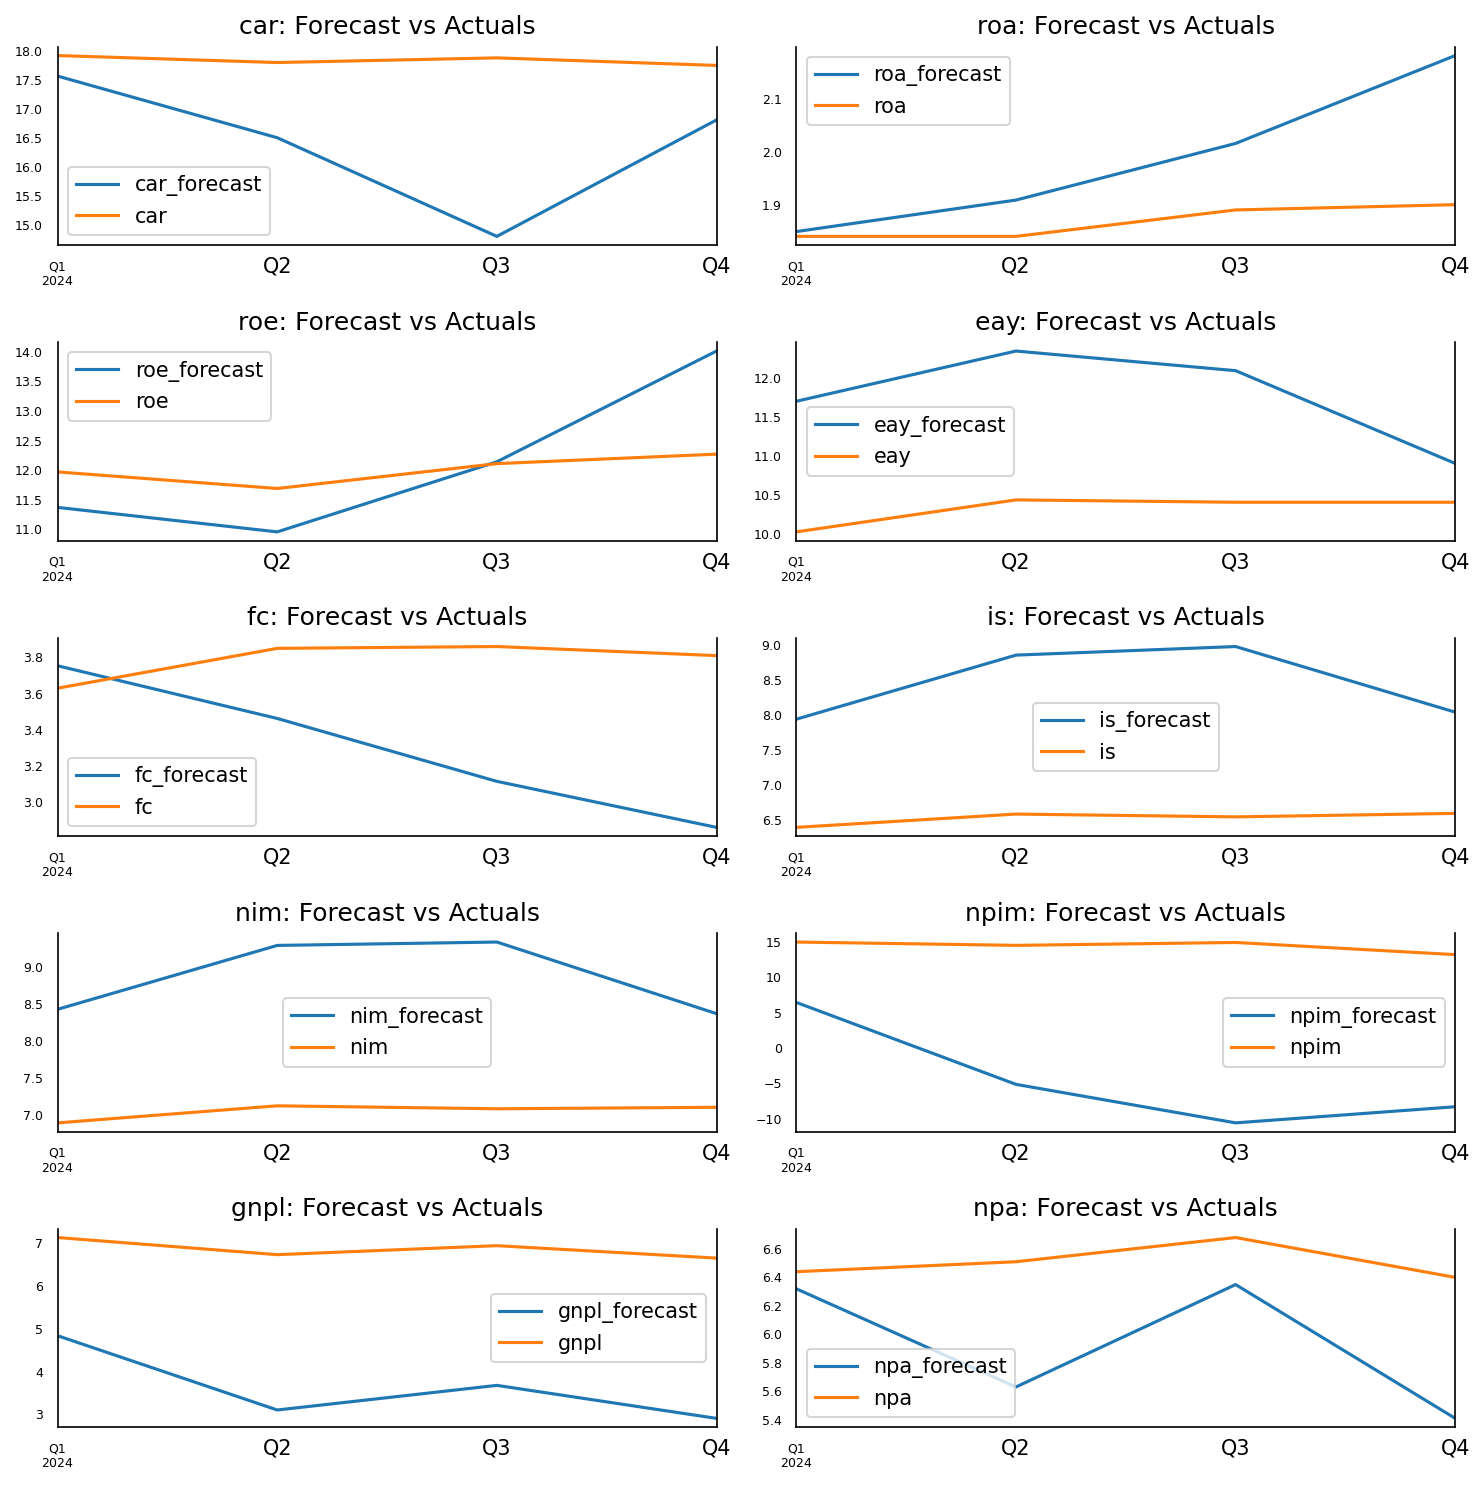

In [101]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
plt.show()